# 상권 클러스터링, 카페 클러스터링 결과 분석 - 상은, 수민, 지헌


## 공유컵 사업 참여 추천 지역, 범위 설정
  ### 1) 매출+인구 고려 - 상권 데이터
        매출이 높고 인구가 많은 상권을 알아내자!
            - 유동인구 고려하는 이유: 테이크 아웃 인원 파악 위함
            - 20/30대 매출 건수, (생활인구 또는) 직장인구 데이터 사용
   - 1-1) 클러스터링 진행 - 거리가 가까운 상권의 경우를 클러스터링 해서, 값을 합쳐 새로운 행을 생성. (지헌) 
   - 1-2) 클러스터링 진행 - 매출과 인구를 고려한 클러스터링 (상은)
   - **추천 상권 도출
        
  ### 2) 위치+밀집도 고려 - 소상공인 카페 데이터
        카페 밀집도가 높은 지역 (가까운 거리 안에, 많은 카페가 존재하는) 을 알아내자!
        
   - 2-1) 클러스터링 진행 - 위치와 밀집도 고려해서 카페 밀집된 구역 추천 (수민)
   - **추천 지역 도출
        
        
#### ⇒  결론: 두 고려사항을 충족하는 지역 = 공유컵 시행 최적 지역 을 찾기 위함

In [51]:
comarea_clustered = pd.read_csv(path+"cafe_road_v2_csv.csv")
comarea_clustered.columns = ['Commercial_Area_Name', 'NumofSales', 'NumofSales_20_30', 
                             'NumofStores', 'Total_Popluation', 'Total_Popluation_Worker', 
                             'longitude', 'latitude', "cluster"]

In [52]:
#직장인구를 직장인 가능 매출 건수로 고려.
comarea_clustered["매출_중_2030매출비중"]=comarea_clustered["NumofSales_20_30"]/comarea_clustered["NumofSales"]
comarea_clustered["매출_중_직장인가능비중"]=comarea_clustered["Total_Popluation_Worker"]/comarea_clustered["NumofSales"]
comarea_clustered["점포_1개당_2030매출건수"]=comarea_clustered["NumofSales_20_30"]/comarea_clustered["NumofStores"]
comarea_clustered["점포_1개당_직장인가능매출건수"]=comarea_clustered["Total_Popluation_Worker"]/comarea_clustered["NumofStores"]

comarea_clustered["점포_1개당_2030매출비중"]=comarea_clustered["매출_중_2030매출비중"]/comarea_clustered["NumofStores"]
comarea_clustered["점포_1개당_직장인가능매출비중"]=comarea_clustered["매출_중_직장인가능비중"]/comarea_clustered["NumofStores"]

In [53]:
comarea_clustered['직장인구_생활인구'] = comarea_clustered['Total_Popluation_Worker']/comarea_clustered['Total_Popluation']

<AxesSubplot:xlabel='NumofSales_20_30', ylabel='Total_Popluation_Worker'>

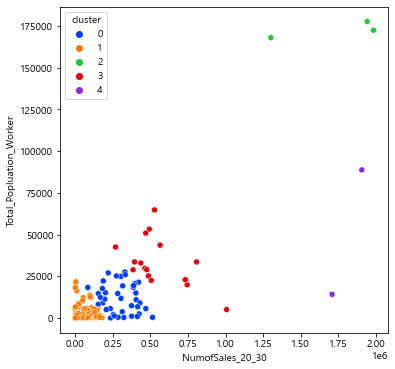

In [54]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='NumofSales_20_30', y='Total_Popluation_Worker',hue= comarea_clustered['cluster'],data=comarea_clustered[["NumofSales_20_30",'Total_Popluation_Worker']], palette='bright')

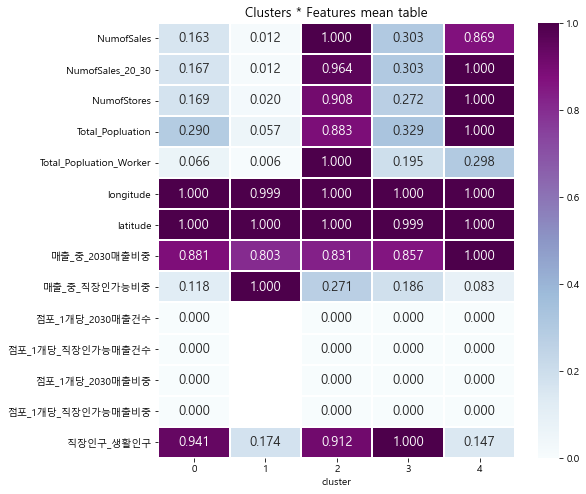

In [55]:
# 평균 데이터 테이블 만들기
temp = comarea_clustered.groupby(['cluster']).mean()    # 클러스터,변수별 평균 구하기
cluster_mean = temp.transpose()    # x축 ↔ y축 전환 (변수들이 y 축으로 배치되게끔)
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)    # 모든 변수의 최대값이 1, 최소값이 0이 되도록 데이터 스케일 조정

# 히트맵으로 그리기
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (8, 8))    # 히트맵 사이즈 설정
annot_kws= {'fontsize':13}    # 히트맵 폰트 사이즈 설정
sns.heatmap(mean_table,     # 히트맵 그릴 데이터셋
			annot=True,     # 레이블 표시 여부
            fmt='.3f',     # 레이블 표시 형식 (소숫점 3째자리까지)
            linewidths = 0.1,     # 히트맵 선 두께
            annot_kws = annot_kws,     # 아까 설정한 폰트 사이즈 적용
            cmap = 'BuPu')    # 컬러맵 설정
plt.title('Clusters * Features mean table', fontsize=13)
plt.show()

<AxesSubplot:xlabel='직장인구_생활인구', ylabel='cluster'>

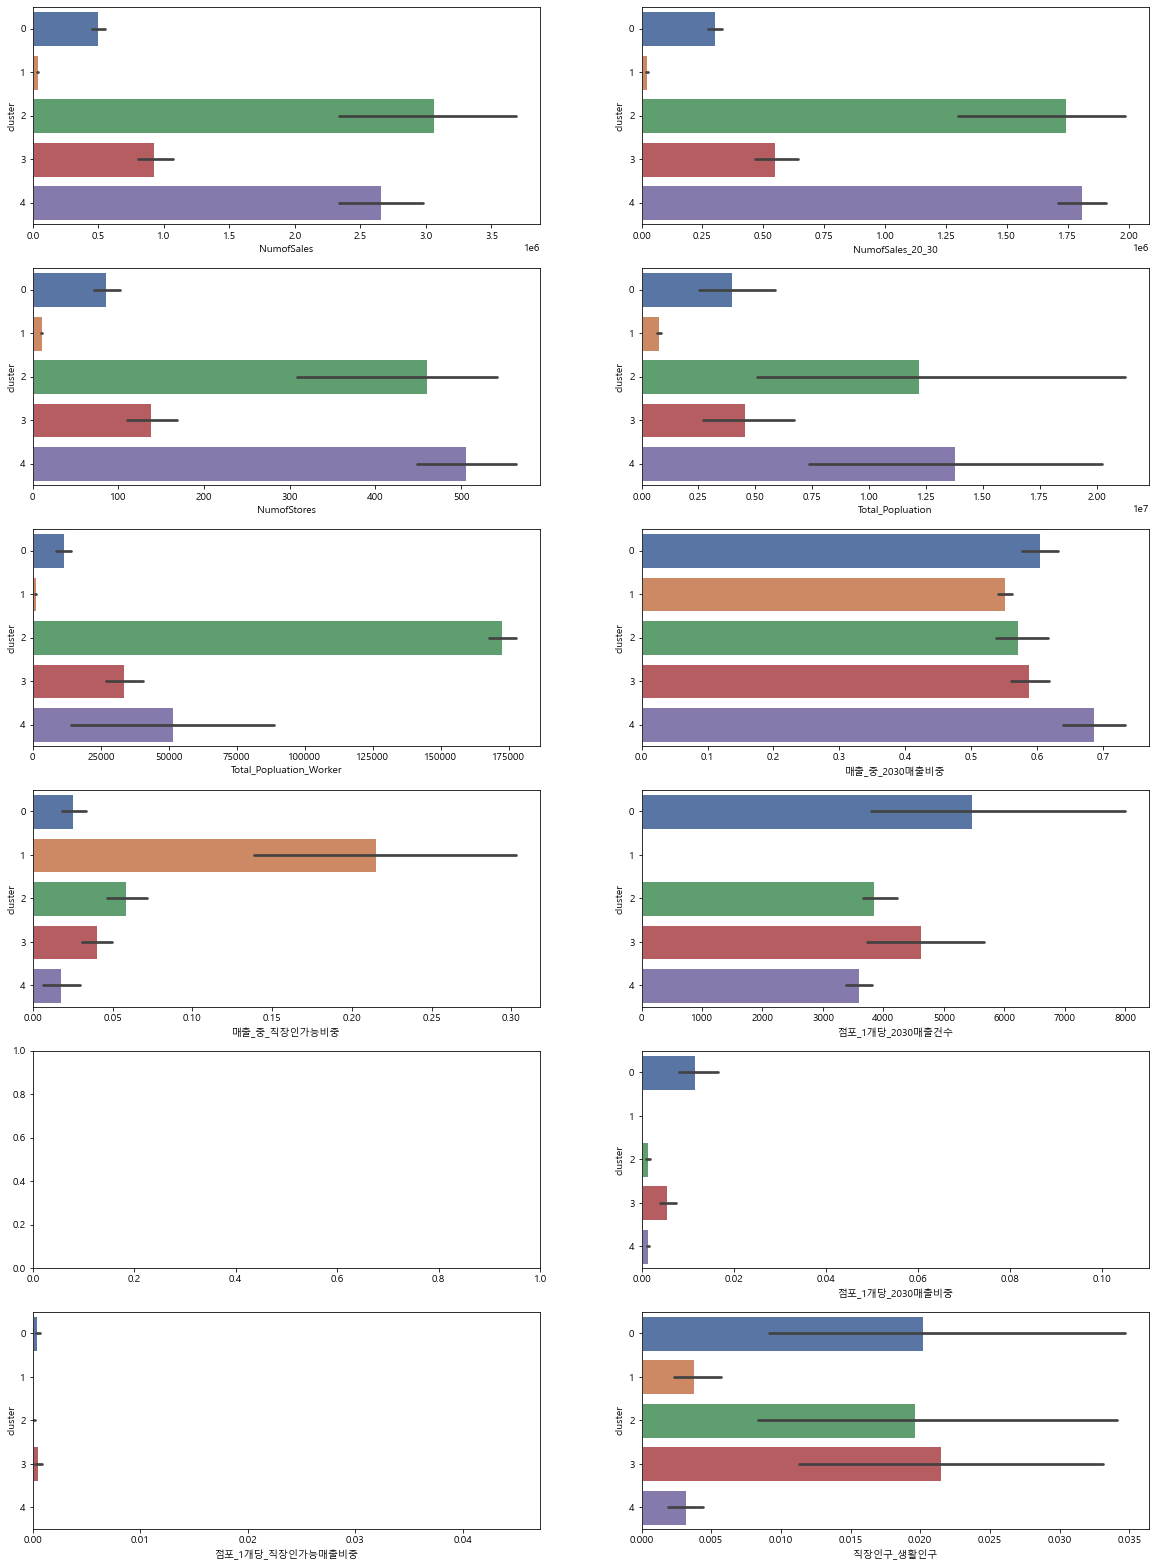

In [56]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11,ax12)) = plt.subplots(nrows=6, ncols=2) 
figure.set_size_inches(20, 28)   # 그래프 전체 사이즈 설정

sns.set_style('darkgrid')
sns.set(font='Malgun Gothic')
sns.barplot(data = comarea_clustered, y = 'cluster', x = 'NumofSales', orient = 'h', ax = ax1)   # x축:값, y축:클러스터
sns.barplot(data = comarea_clustered, y = 'cluster', x = 'NumofSales_20_30', orient = 'h', ax = ax2)
sns.barplot(data = comarea_clustered, y = 'cluster', x = 'NumofStores', orient = 'h', ax = ax3)   # boxplot
sns.barplot(data = comarea_clustered, y = 'cluster', x = 'Total_Popluation', orient = 'h', ax = ax4)
sns.barplot(data = comarea_clustered, y = 'cluster', x = 'Total_Popluation_Worker', orient = 'h', ax = ax5)
sns.barplot(data = comarea_clustered, y = 'cluster', x = '매출_중_2030매출비중', orient = 'h', ax = ax6)
sns.barplot(data = comarea_clustered, y = 'cluster', x = '매출_중_직장인가능비중', orient = 'h', ax = ax7)
sns.barplot(data = comarea_clustered, y = 'cluster', x = '점포_1개당_2030매출건수', orient = 'h', ax = ax8)
# sns.barplot(data = comarea_clustered, y = 'cluster', x = '직장인구수_점포', orient = 'h', ax = ax9)
sns.barplot(data = comarea_clustered, y = 'cluster', x = '점포_1개당_2030매출비중', orient = 'h', ax = ax10)
sns.barplot(data = comarea_clustered, y = 'cluster', x = '점포_1개당_직장인가능매출비중', orient = 'h', ax = ax11)
sns.barplot(data = comarea_clustered, y = 'cluster', x = '직장인구_생활인구', orient = 'h', ax = ax12)

In [59]:
#label 0 
label = {0:[],1:[],2:[],3:[],4:[],5:[]}

for i in range(0,6):
    label[i] = comarea_clustered[comarea_clustered['cluster']==i]

In [60]:
dbscan_label = {0:[],1:[],2:[],3:[],4:[],5:[]}

for name,dbscan in zip(cafe_sales_202102['상권_코드_명'],cafe_sales_202102['dbscan']):
    if name in set(label[0]['Commercial_Area_Name']):
        dbscan_label[0].append(dbscan)
    if name in set(label[1]['Commercial_Area_Name']):
        dbscan_label[1].append(dbscan)
    if name in set(label[2]['Commercial_Area_Name']):
        dbscan_label[2].append(dbscan)
    if name in set(label[3]['Commercial_Area_Name']):
        dbscan_label[3].append(dbscan)
    if name in set(label[4]['Commercial_Area_Name']):
        dbscan_label[4].append(dbscan)
    if name in set(label[5]['Commercial_Area_Name']):
        dbscan_label[5].append(dbscan)

In [61]:
print(label[0]['NumofStores'].mean(),": min - ",label[0]['NumofStores'].min(),":max - ",label[0]['NumofStores'].max())
print(label[1]['NumofStores'].mean(),": min - ",label[1]['NumofStores'].min(),":max - ",label[1]['NumofStores'].max())
print(label[2]['NumofStores'].mean(),": min - ",label[2]['NumofStores'].min(),":max - ",label[2]['NumofStores'].max())
print(label[3]['NumofStores'].mean(),": min - ",label[3]['NumofStores'].min(),":max - ",label[3]['NumofStores'].max())
print(label[4]['NumofStores'].mean(),": min - ",label[4]['NumofStores'].min(),":max - ",label[4]['NumofStores'].max())

85.65853658536585 : min -  7 :max -  242
10.128424657534246 : min -  0 :max -  124
459.6666666666667 : min -  308 :max -  542
137.8125 : min -  30 :max -  277
506.0 : min -  448 :max -  564


### Label 0:
* 점포수: 평균 85 (7 – 242)
* 전체 매출 대비 2030의 매출 비율이 높고 (2위)
* 점포 수를 고려하면 2030의 매출 비율이 가장 높은 지역.
* 평균적으로, 유동인구 대비 직장인구가 높음 (2위) 
* 가디, 여의도, 노량진, 이태원, 디지털미디어시티, 시청, 건대 등



In [62]:
#label 0 
label_name_index = label[0]['Commercial_Area_Name'][label[0]['Commercial_Area_Name'].index[0]]
label[0].head(10)

,Commercial_Area_Name,NumofSales,NumofSales_20_30,NumofStores,Total_Popluation,Total_Popluation_Worker,longitude,latitude,cluster,매출_중_2030매출비중,매출_중_직장인가능비중,점포_1개당_2030매출건수,점포_1개당_직장인가능매출건수,점포_1개당_2030매출비중,점포_1개당_직장인가능매출비중,직장인구_생활인구
0,동대문패션타운 관광특구,637312,405782,164,9466745,10966,127.011025,37.567312,0,0.636709,0.017207,2474.280488,66.865854,0.003882,0.000105,0.001158
2,길동복조리시장,598236,304815,215,28606766,11714,127.143675,37.538447,0,0.509523,0.019581,1417.744186,54.483721,0.002370,0.000091,0.000409
3,암사종합시장,739289,421437,242,19900216,21477,127.129134,37.550934,0,0.570057,0.029051,1741.475207,88.747934,0.002356,0.000120,0.001079
7,남성사계시장,767464,470171,104,8878220,5582,126.980834,37.488230,0,0.612629,0.007273,4520.875000,53.673077,0.005891,0.000070,0.000629
13,영진시장,580452,430990,116,4751225,8995,126.912848,37.553423,0,0.742508,0.015497,3715.431034,77.543103,0.006401,0.000134,0.001893
17,강북종합시장,384232,233973,123,13756903,5622,127.025698,37.642326,0,0.608937,0.014632,1902.219512,45.707317,0.004951,0.000119,0.000409
24,회기시장,542980,376000,81,6148924,1069,127.055572,37.591113,0,0.692475,0.001969,4641.975309,13.197531,0.008549,0.000024,0.000174
25,전곡시장,339592,183598,106,9469058,9042,127.068830,37.578087,0,0.540643,0.026626,1732.056604,85.301887,0.005100,0.000251,0.000955
26,능동로골목시장,553491,425654,119,8153436,2471,127.066743,37.535110,0,0.769035,0.004464,3576.924370,20.764706,0.006462,0.000038,0.000303
30,방산종합시장,386586,187266,76,3118895,22211,127.000124,37.568033,0,0.484410,0.057454,2464.026316,292.250000,0.006374,0.000756,0.007121


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

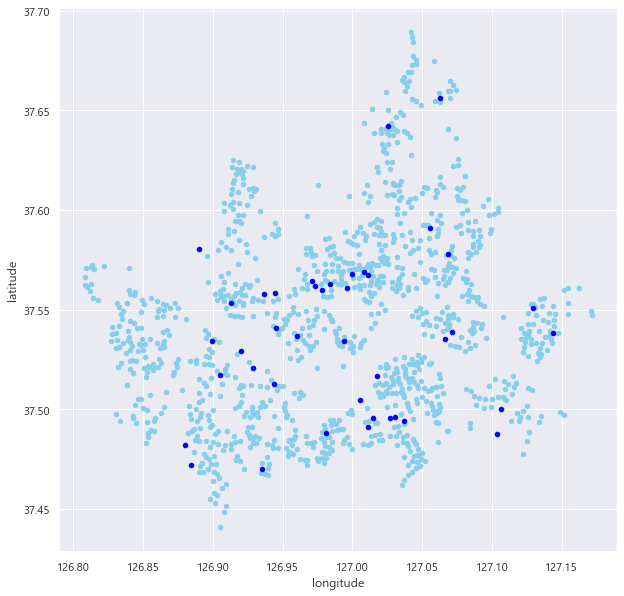

In [68]:
fig, ax = plt.subplots(figsize=(10,10))

cafe_sales_202102.plot.scatter(x='longitude',y='latitude',ax=ax,color='skyblue')
label[0].plot.scatter(x='longitude',y='latitude',ax=ax,color='blue')
# for name,long,lat in zip(label[0]['Commercial_Area_Name'],label[0]['longitude'],label[0]['latitude']):
#         plt.text(long, lat, name, color = "blue", fontsize=12, weight='bold')

### label 1
* 점포수: 평균 10 (0 – 124)
* 점포 수를 고려한, 직장인의 매출 가능 비중이 높음. (점포수가 심히 적기 떄문으로 보임)
* 거의 골목상권, 전통시장으로 분류된 상권


In [64]:
#label 1
label[1].head(10)

,Commercial_Area_Name,NumofSales,NumofSales_20_30,NumofStores,Total_Popluation,Total_Popluation_Worker,longitude,latitude,cluster,매출_중_2030매출비중,매출_중_직장인가능비중,점포_1개당_2030매출건수,점포_1개당_직장인가능매출건수,점포_1개당_2030매출비중,점포_1개당_직장인가능매출비중,직장인구_생활인구
6,봉천중앙시장,103026,75078,55,4396811,2290,126.954468,37.484304,1,0.728729,0.022227,1365.054545,41.636364,0.013250,0.000404,0.000521
8,흑석시장,21215,10111,18,760229,224,126.963344,37.507291,1,0.476597,0.010559,561.722222,12.444444,0.026478,0.000587,0.000295
9,상도전통시장,111403,62699,31,2848602,1301,126.952118,37.499160,1,0.562812,0.011678,2022.548387,41.967742,0.018155,0.000377,0.000457
10,화곡중앙골목시장,33025,18626,20,4036426,1293,126.839146,37.534560,1,0.563997,0.039152,931.300000,64.650000,0.028200,0.001958,0.000320
11,신정3동골목시장,78764,41248,10,704860,286,126.853003,37.518720,1,0.523691,0.003631,4124.800000,28.600000,0.052369,0.000363,0.000406
12,망원월드컵시장,172542,103021,61,3650957,2200,126.905406,37.558130,1,0.597078,0.012751,1688.868852,36.065574,0.009788,0.000209,0.000603
14,공덕시장,204248,104330,46,1714052,12291,126.952904,37.544535,1,0.510801,0.060177,2268.043478,267.195652,0.011104,0.001308,0.007171
15,연서시장,204199,122717,68,6307371,2018,126.921673,37.619571,1,0.600968,0.009883,1804.661765,29.676471,0.008838,0.000145,0.000320
16,상계중앙시장,6534,2644,22,5590623,632,127.069994,37.659778,1,0.404653,0.096725,120.181818,28.727273,0.018393,0.004397,0.000113
18,숭인시장,170115,97423,44,1177765,836,127.029255,37.613539,1,0.572689,0.004914,2214.159091,19.000000,0.013016,0.000112,0.000710


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

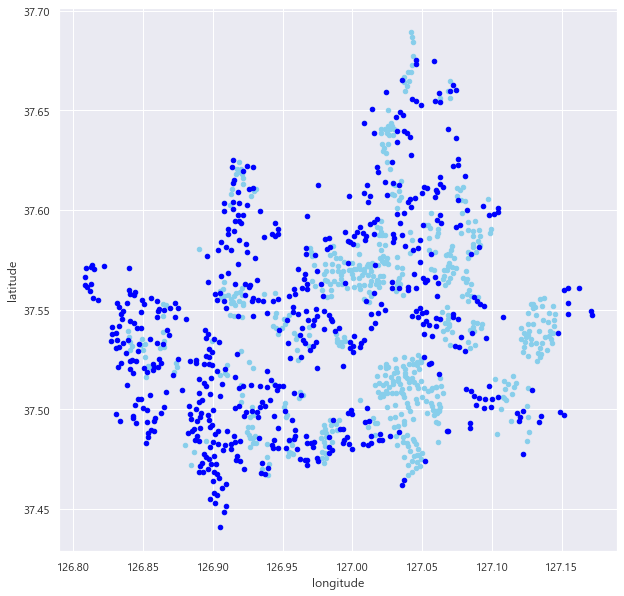

In [65]:
fig, ax = plt.subplots(figsize=(10,10))

cafe_sales_202102.plot.scatter(x='longitude',y='latitude',ax=ax,color='skyblue')
label[1].plot.scatter(x='longitude',y='latitude',ax=ax,color='blue')
# for name,long,lat in zip(label[1]['Commercial_Area_Name'],label[1]['longitude'],label[1]['latitude']):
#         plt.text(long, lat, name, color = "blue", fontsize=8, weight='bold')

### label 2
* 점포수: 평균 459 (308 - 542)
* 총 매출 건수, 직장인구 수가 가장 높은 상권.
* 유동인구 대비 직장인구가 많은 지역(2위), 직장인의 매출이 높을 것으로 예상
* 초 발달상권으로 분류. 명동, 압구정, 강남 


In [66]:
#label 2
label_name_index = label[2]['Commercial_Area_Name'][label[2]['Commercial_Area_Name'].index[2]]
label[2].head(20)

,Commercial_Area_Name,NumofSales,NumofSales_20_30,NumofStores,Total_Popluation,Total_Popluation_Worker,longitude,latitude,cluster,매출_중_2030매출비중,매출_중_직장인가능비중,점포_1개당_2030매출건수,점포_1개당_직장인가능매출건수,점포_1개당_2030매출비중,점포_1개당_직장인가능매출비중,직장인구_생활인구
1,명동 남대문 북창동 다동 무교동 관광특구,3686686,1984261,542,5059404,172521,126.981856,37.564149,2,0.538223,0.046796,3660.998155,318.304428,0.000993,0.000086,0.034099
43,압구정 로데오거리_2,3150080,1941826,529,21237868,177737,127.037197,37.526113,2,0.616437,0.056423,3670.748582,335.986767,0.001165,0.000107,0.008369
47,강남 마이스 관광특구,2338126,1301632,308,10270165,167999,127.060059,37.511003,2,0.556699,0.071852,4226.077922,545.451299,0.001807,0.000233,0.016358


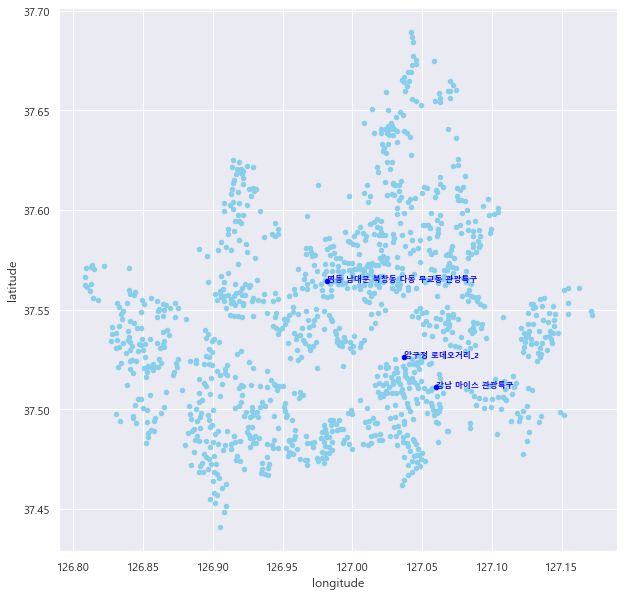

In [67]:
fig, ax = plt.subplots(figsize=(10,10))

cafe_sales_202102.plot.scatter(x='longitude',y='latitude',ax=ax,color='skyblue')
label[2].plot.scatter(x='longitude',y='latitude',ax=ax,color='blue')
for name,long,lat in zip(label[2]['Commercial_Area_Name'],label[2]['longitude'],label[2]['latitude']):
        plt.text(long, lat, name, color = "blue", fontsize=8, weight='bold')

### label 3
* 점포수: 평균 137 (30 - 277)
* 점포 수를 고려한 2030의 매출 비율이 높은 지역. (2위)
* 유동인구 대비 직장인구가 가장 많은 지역, 직장인의 매출이 높을 것으로 예상
* 구디, 가디, 여의도, 시청, 종로, 강남, 역삼


In [69]:
label[3].head(20)

,Commercial_Area_Name,NumofSales,NumofSales_20_30,NumofStores,Total_Popluation,Total_Popluation_Worker,longitude,latitude,cluster,매출_중_2030매출비중,매출_중_직장인가능비중,점포_1개당_2030매출건수,점포_1개당_직장인가능매출건수,점포_1개당_2030매출비중,점포_1개당_직장인가능매출비중,직장인구_생활인구
4,잠실 관광특구,753573,464046,121,6358907,29779,127.115275,37.516476,3,0.615794,0.039517,3835.090909,246.107438,0.005089,0.000327,0.004683
29,서울중앙시장,783592,487867,205,17062078,25219,127.019639,37.566960,3,0.622603,0.032184,2379.839024,123.019512,0.003037,0.000157,0.001478
33,서울 종로구 안국역_2,816110,493288,191,2085448,53254,126.984310,37.577466,3,0.604438,0.065253,2582.659686,278.816754,0.003165,0.000342,0.025536
34,통인시장,693072,385583,159,1839121,28871,126.969908,37.580680,3,0.556339,0.041657,2425.050314,181.578616,0.003499,0.000262,0.015698
35,서울 종로구 종로3가역_3,1533991,807510,277,4677322,33570,126.993921,37.573737,3,0.526411,0.021884,2915.198556,121.191336,0.001900,0.000079,0.007177
48,포스코사거리_1,966855,469873,144,6512210,50900,127.054007,37.508961,3,0.485981,0.052645,3263.006944,353.472222,0.003375,0.000366,0.007816
51,보라매공원,1433625,1007698,134,9191792,5105,126.925042,37.491172,3,0.702902,0.003561,7520.134328,38.097015,0.005246,0.000027,0.000555
52,뱅뱅사거리_2,899591,476561,102,2068224,28955,127.032487,37.491696,3,0.529753,0.032187,4672.166667,283.872549,0.005194,0.000316,0.014000
53,매봉역,1035024,528095,201,11828628,64776,127.043486,37.485106,3,0.510225,0.062584,2627.338308,322.268657,0.002538,0.000311,0.005476
71,종로?청계 관광특구,723493,437248,140,3889871,32935,126.997374,37.569998,3,0.604357,0.045522,3123.200000,235.250000,0.004317,0.000325,0.008467


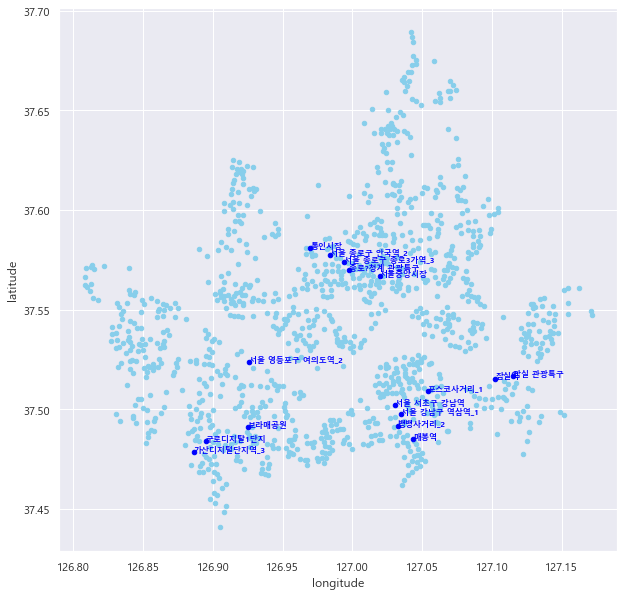

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

cafe_sales_202102.plot.scatter(x='longitude',y='latitude',ax=ax,color='skyblue')
label[3].plot.scatter(x='longitude',y='latitude',ax=ax,color='blue')
for name,long,lat in zip(label[3]['Commercial_Area_Name'],label[3]['longitude'],label[3]['latitude']):
        plt.text(long, lat, name, color = "blue", fontsize=8, weight='bold')

### label 4
* 점포수: 평균 506 (448 - 564)
* 전체 매출 대비 2030의 매출 비율이 가장 높은 지역.
* 2030의 총 매출 건수, 총 점포 수 또한 가장 높은 지역
* 유동인구가 가장 많은 지역
* 압구정역, 가로수길, 홍대


In [71]:
label[4].head(20)

,Commercial_Area_Name,NumofSales,NumofSales_20_30,NumofStores,Total_Popluation,Total_Popluation_Worker,longitude,latitude,cluster,매출_중_2030매출비중,매출_중_직장인가능비중,점포_1개당_2030매출건수,점포_1개당_직장인가능매출건수,점포_1개당_2030매출비중,점포_1개당_직장인가능매출비중,직장인구_생활인구
5,영동전통시장,2981219,1906586,564,20241787,88779,127.024181,37.509178,4,0.639532,0.029779,3380.471631,157.409574,0.001134,0.000053,0.004386
37,서교시장,2332755,1708916,448,7360269,14151,126.921539,37.553393,4,0.732574,0.006066,3814.544643,31.587054,0.001635,0.000014,0.001923


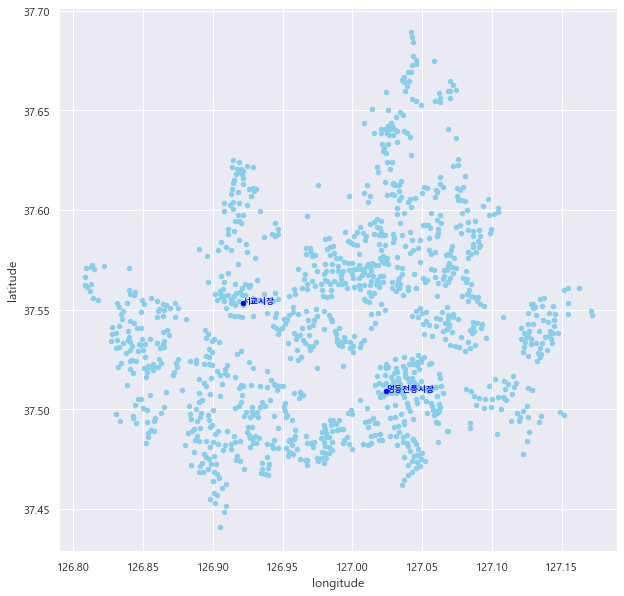

In [72]:
fig, ax = plt.subplots(figsize=(10,10))

cafe_sales_202102.plot.scatter(x='longitude',y='latitude',ax=ax,color='skyblue')
label[4].plot.scatter(x='longitude',y='latitude',ax=ax,color='blue')
for name,long,lat in zip(label[4]['Commercial_Area_Name'],label[4]['longitude'],label[4]['latitude']):
        plt.text(long, lat, name, color = "blue", fontsize=8, weight='bold')

### == 총 매출 건수가 높고, 2030의 매출이 높으며, 직장인구의 비율이 높은 초 발달상권인 Label 2를 선택.